In [3]:
import pandas as pd
import MySQLdb

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
db = MySQLdb.connect(host="172.18.55.6",    # tu host, usualmente localhost
                     user="comandato",         # tu usuario
                     passwd="comandato123",  # tu password
                     db="SISTEMECUADOR_ATM")        # el nombre de la base de datos

In [6]:
mes=1

In [7]:
writer = pd.ExcelWriter('ASIGNACION MES DICIEMBRE.xlsx', engine='xlsxwriter')

In [8]:
totales=""" SELECT *  FROM 
                    SISTEMECUADOR_ATM.MULTAS_MENSUALES 
                where 
                    Mes={0}""".format(mes)

In [9]:
total=pd.read_sql(totales, con=db)

In [10]:
total.to_excel(writer, sheet_name='TOTAL')
worksheet = writer.sheets['TOTAL']

In [11]:
infractores=""" SELECT Cedula,count(*) as multas,
                    sum(Saldo) as monto,Segmento,Cartera,
                    min(Dias_mora) as menor_mora,max(Dias_mora) as mayor_mora,
                    min(Dia) as ingreso 
                FROM 
                    SISTEMECUADOR_ATM.MULTAS_MENSUALES 
                where 
                    Mes={0} group by Cedula,Cartera""".format(mes)

In [12]:
resultado=pd.read_sql(infractores, con=db)

In [13]:
resultado.tail()

,Cedula,multas,monto,Segmento,Cartera,menor_mora,mayor_mora,ingreso
35637,FB591820,1,386.0,MULTAS NUEVAS,CORRIENTE,156,156,2
35638,G09730548,1,37.5,MULTAS NUEVAS,MENOR,756,756,2
35639,I685506,1,57.9,MULTAS NUEVAS,CORRIENTE,40,40,2
35640,PE102221,1,115.8,MULTAS NUEVAS,CORRIENTE,142,142,2
35641,XDA822644,3,289.5,MULTAS NUEVAS,CORRIENTE,11,236,2


In [14]:
resultado.groupby(['ingreso','Cartera']).multas.count()

ingreso  Cartera  
2        CORRIENTE    13850
         MENOR        20664
3        CORRIENTE       55
4        CORRIENTE       60
         MENOR           21
7        CORRIENTE      131
         MENOR           10
8        CORRIENTE       72
         MENOR            4
9        CORRIENTE       69
         MENOR            4
10       CORRIENTE       68
         MENOR            3
11       CORRIENTE       52
         MENOR            4
14       CORRIENTE      287
         MENOR            5
16       CORRIENTE       57
         MENOR            5
17       CORRIENTE       27
         MENOR            3
18       CORRIENTE       61
         MENOR            5
21       CORRIENTE      120
         MENOR            5
Name: multas, dtype: int64

In [15]:
multas=""" SELECT Dia,count(*) as num_multas,sum(Saldo) as monto
                FROM 
                    SISTEMECUADOR_ATM.MULTAS_MENSUALES 
                where 
                    Mes={0} group by Dia""".format(mes)

In [16]:
resultado_multas=pd.read_sql(multas, con=db)

In [17]:
resultado_multas

,Dia,num_multas,monto
0,2,67002,5121803.61
1,3,101,10924.20
2,4,143,19184.60
3,7,240,29079.10
4,8,125,16708.00
5,9,129,12452.80
6,10,112,13975.10
7,11,93,9618.70
8,14,411,47882.80
9,16,158,19325.80


In [18]:
resultado.to_excel(writer, sheet_name='BASE')
worksheet = writer.sheets['BASE']

In [19]:
resultado_multas.to_excel(writer, sheet_name='multas')
worksheet = writer.sheets['multas']

In [20]:
writer.save()

In [21]:
resultado_multas.set_index('Dia',inplace=True)

In [ ]:
resultado_multas['monto'][:].plot.line()

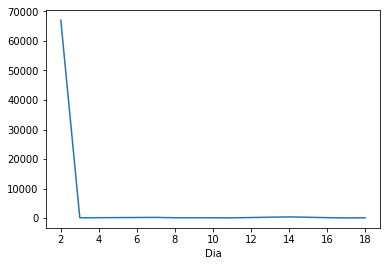

In [21]:
resultado_multas[:]['num_multas'].plot.line()

In [22]:
resultado_multas.sum()

num_multas      68703.00
monto         5318392.11
dtype: float64